In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "dummy_sampler"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.074533,0.050680,-0.018062,0.008101,-0.019456,-0.024800,-0.065491,0.034309,0.067317,-0.017646,101.0
1,-0.060003,0.050680,0.049840,0.018429,-0.016704,-0.030124,-0.017629,-0.002592,0.049769,-0.059067,221.0
2,0.063504,0.050680,-0.025607,0.011544,0.064477,0.048477,0.030232,-0.002592,0.038393,0.019633,170.0
3,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058039,0.040343,189.0
4,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
5,-0.038207,-0.044642,-0.054707,-0.077971,-0.033216,-0.086490,0.140681,-0.076395,-0.019197,-0.005220,60.0
6,-0.016412,0.050680,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064,308.0
7,-0.092695,0.050680,-0.090275,-0.057314,-0.024960,-0.030437,-0.006584,-0.002592,0.024053,0.003064,94.0
8,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220,219.0
9,-0.012780,-0.044642,-0.065486,-0.069938,0.001183,0.016849,-0.002903,-0.007020,-0.030751,-0.050783,96.0


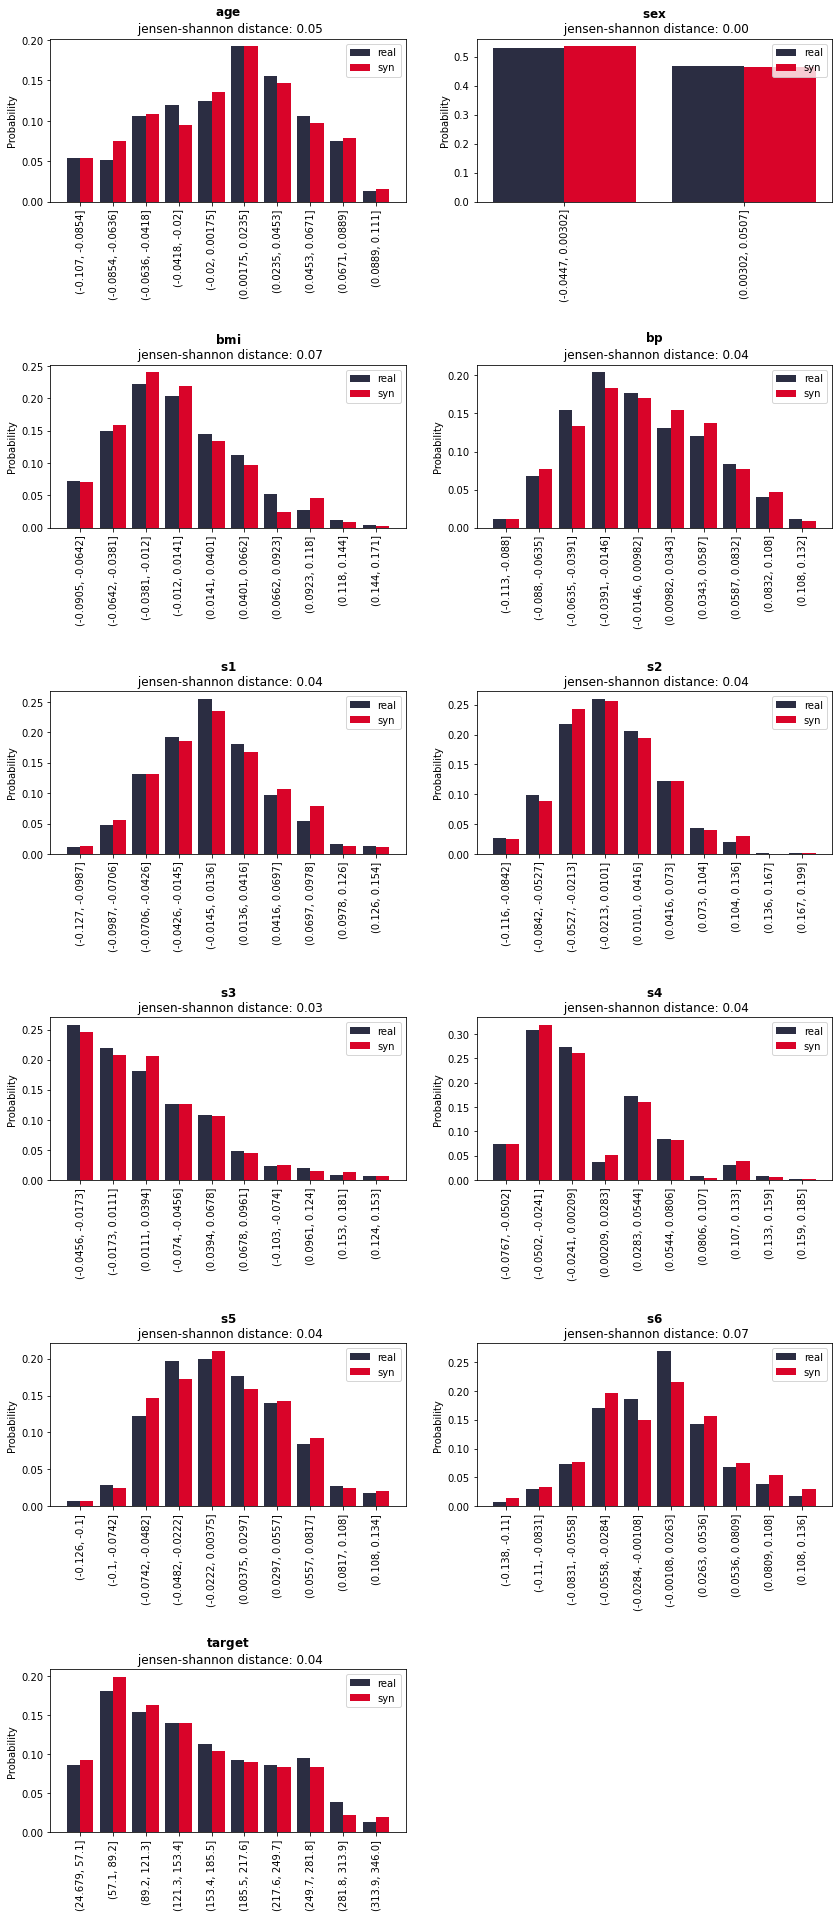

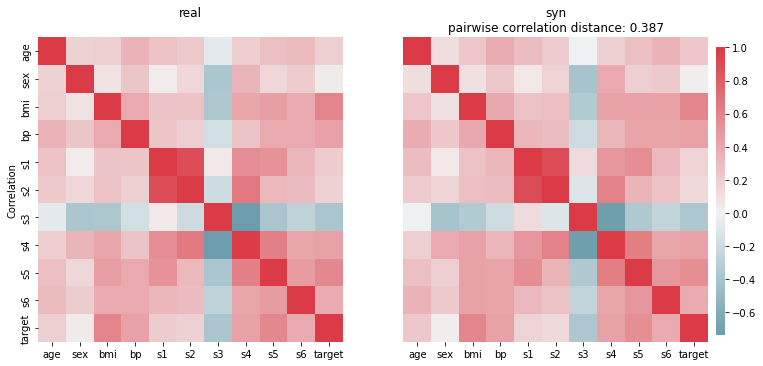

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : dummy_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.615385,0.624434,0.619155,0.003845,0.617647,0.004525,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.038312,0.039249,0.038689,0.000404,0.038506,0.000469,3,0,0.02
sanity.inlier_probability,0.968326,0.975113,0.972097,0.002822,0.972851,0.003394,3,0,0.01
sanity.outlier_probability,0.004525,0.009050,0.006787,0.001847,0.006787,0.002262,3,0,0.01
statistical.marginal.jensenshannon_distance,0.042162,0.051297,0.046735,0.003729,0.046745,0.004567,3,0,0.27
statistical.marginal.chi_squared_test,0.724974,0.907121,0.816430,0.074363,0.817194,0.091073,3,0,0.04
statistical.joint.feature_correlation,0.472724,0.521860,0.489219,0.023081,0.473072,0.024568,3,0,0.18
statistical.marginal.inverse_cdf_distance,0.172373,0.177154,0.175419,0.002160,0.176730,0.002390,3,0,6.61
statistical.marginal.inverse_kl_divergence,0.972332,0.988626,0.979387,0.006829,0.977203,0.008147,3,0,0.02
